<a href="https://colab.research.google.com/github/pradeepbhatt/AML_3014/blob/main/Assignment_4_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

This cell loads the Fashion MNIST dataset from Keras and prints out the shape of the training data and the number of samples in both the training and test sets.

In [22]:
# Loading  the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#exploring the dataset
print("Training data shape:", train_images.shape)
print("Number of training samples:", len(train_labels))
print("Number of test samples:", len(test_labels))


Training data shape: (60000, 28, 28)
Number of training samples: 60000
Number of test samples: 10000


In [23]:
# class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [24]:
# Understanding Dataset Structure
print("Training Images Shape:", train_images.shape)
print("Training Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

# Display first few entries of train_labels
print("\nFirst 10 Training Labels:", train_labels[:10])


Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)

First 10 Training Labels: [9 0 0 3 0 2 7 2 5 5]


In [25]:
# Data Preprocessing
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

#data scaling
train_images = train_images / 255.0
test_images = test_images / 255.0

# One-hot encoding labels
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)



it  scales the pixel values of the images to a range between 0 and 1,  for neural network inputs.

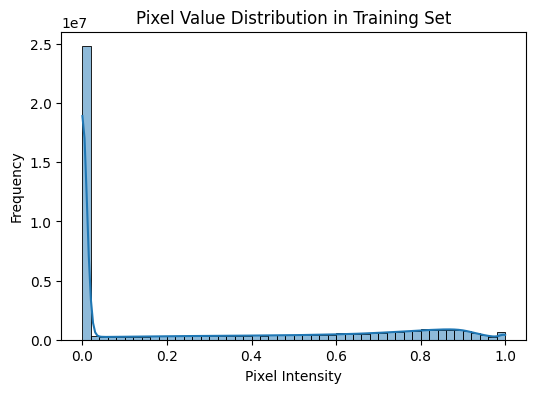

In [26]:
#  Pixel Value Distribution
plt.figure(figsize=(6,4))
sns.histplot(train_images.flatten(), bins=50, kde=True)
plt.title('Pixel Value Distribution in Training Set')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


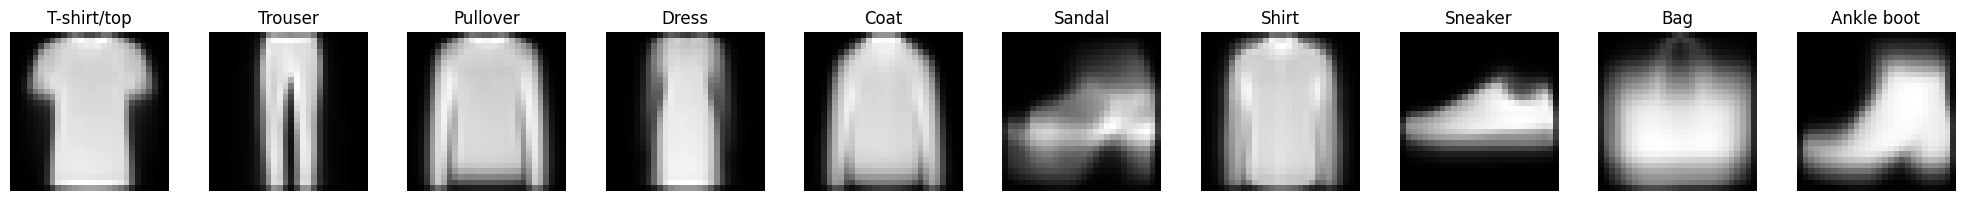

In [27]:
# Average Image Per Class
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    class_images = train_images[train_labels == i]
    class_mean = np.mean(class_images, axis=0)
    axes[i].imshow(class_mean.squeeze(), cmap='gray')
    axes[i].set_title(class_names[i])
    axes[i].axis('off')
plt.tight_layout()
plt.show()


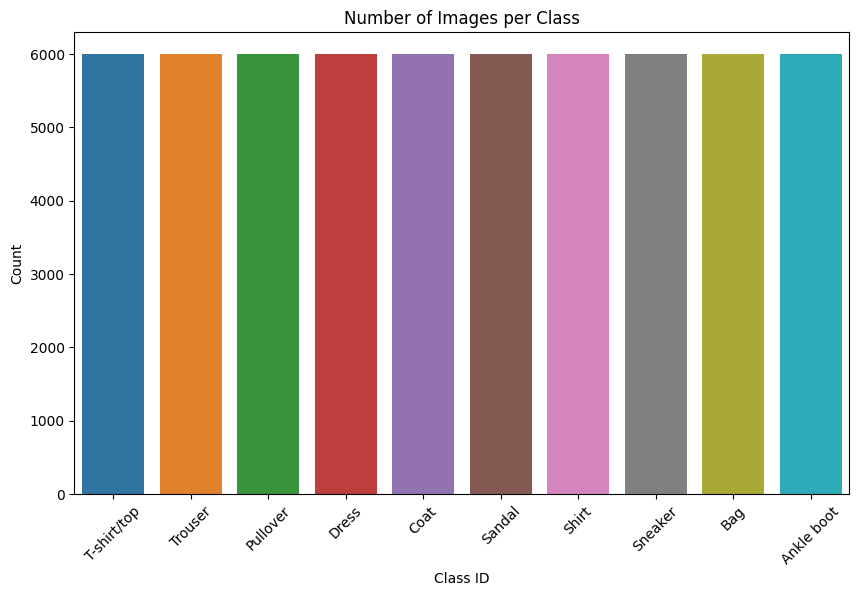

In [28]:
# Class-wise Image Count
plt.figure(figsize=(10, 6))
sns.countplot(x=train_labels)
plt.title('Number of Images per Class')
plt.xlabel('Class ID')
plt.ylabel('Count')
plt.xticks(ticks=range(10), labels=class_names, rotation=45)
plt.show()


In [ ]:
# Pixel Intensity Analysis per Class
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    sns.histplot(train_images[train_labels == i].flatten(), bins=50, kde=True)
    plt.title(class_names[i])
    plt.xlim([0, 1])
plt.tight_layout()
plt.show()


In [ ]:
# Correlation Heatmap of Pixel Intensity
sample_size = 500
sampled_images = train_images[:sample_size].reshape(sample_size, -1)
corr = np.corrcoef(sampled_images, rowvar=False)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Correlation Heatmap of Pixel Intensities')
plt.show()


In [ ]:
# Visualize class distribution
plt.figure(figsize=(8, 4))
sns.countplot(train_labels)
plt.title('Distribution of Classes in Training Set')
plt.xlabel('Class ID')
plt.ylabel('Count')
plt.xticks(range(10), class_names)
plt.show()


constructing  the ANN model. It consists of a Flatten layer to convert 2D images into 1D arrays, followed by two Dense layers with ReLU and softmax activations

In [13]:
# Build the ANN model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5201 - accuracy: 0.8159 - val_loss: 0.4212 - val_accuracy: 0.8473
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3832 - accuracy: 0.8631 - val_loss: 0.3894 - val_accuracy: 0.8618
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3449 - accuracy: 0.8745 - val_loss: 0.3428 - val_accuracy: 0.8788
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3171 - accuracy: 0.8839 - val_loss: 0.3398 - val_accuracy: 0.8775
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2971 - accuracy: 0.8893 - val_loss: 0.3333 - val_accuracy: 0.8801
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2856 - accuracy: 0.8939 - val_loss: 0.3411 - val_accuracy: 0.8756
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2699 - accuracy: 0.8990 - val_loss: 0.3129 - val_accuracy:

In [20]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Generate predictions
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Classification report
print("\nClassification Report:\n")
print(classification_report(test_labels, predicted_classes, target_names=class_names))

313/313 - 0s - loss: 0.3563 - accuracy: 0.8778 - 362ms/epoch - 1ms/step

Test accuracy: 0.8777999877929688
313/313 [==============================] - 0s 1ms/step

Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.79      0.83      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.79      0.78      0.78      1000
       Dress       0.86      0.89      0.88      1000
        Coat       0.71      0.88      0.79      1000
      Sandal       0.96      0.96      0.96      1000
       Shirt       0.74      0.64      0.69      1000
     Sneaker       0.94      0.95      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



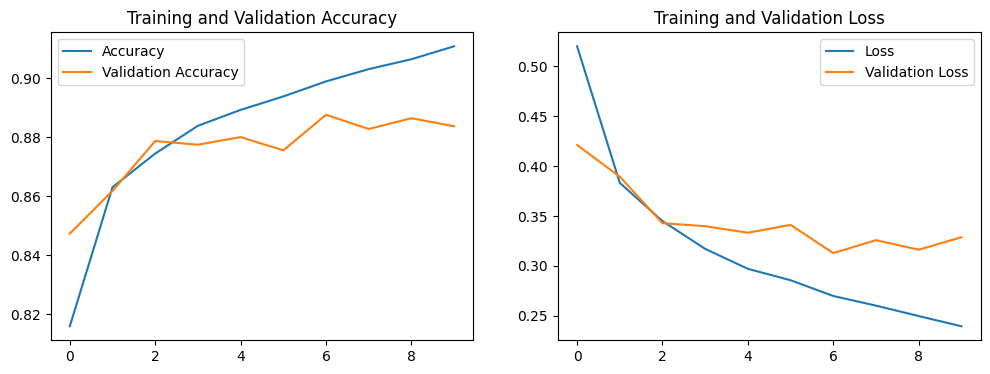

In [19]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


Confusion Matrix:



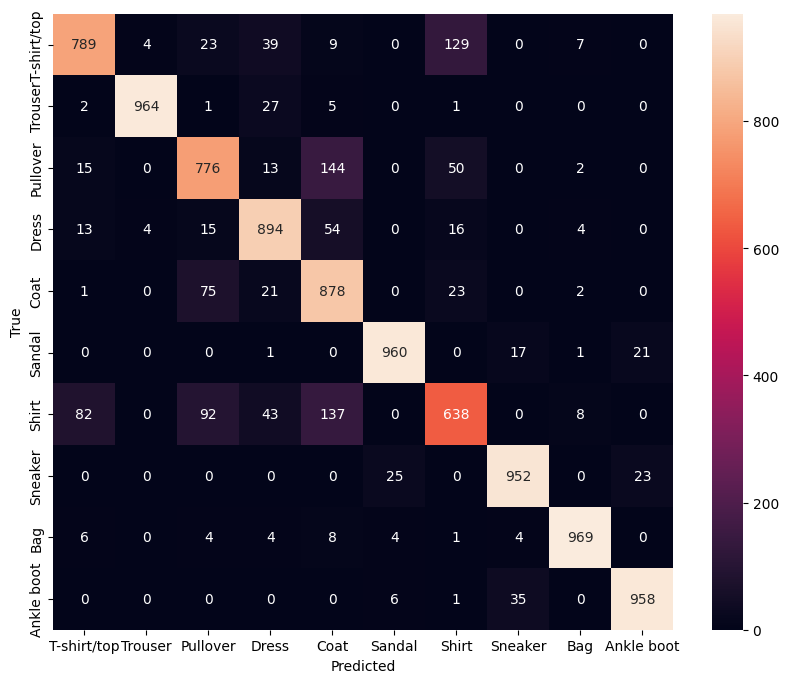

In [17]:
# Confusion matrix
print("\nConfusion Matrix:\n")
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()